In [635]:
from math import sqrt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') 

from scipy import stats

import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import OLSInfluence

from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro


In [636]:
df = pd.read_csv(r"data/tumanova.csv")

In [637]:
df

,Модель (полное название),Модель процессора,Год выпуска процессора,Тактовая частота процессора(ГГц),Максимальная тактовая частота процессора(ГГц),Частота шины процессора(GT/s),Объема кэша L2 процессора(Мб),Объема кэша L3 процессора(Мб),Объем оперативной памяти (Гб),Частота оперативной памяти (МГц),Тип оперативной памяти,Вид накопителя,Вид графического ускорителя,Количество ядер,Количество потоков,Результа ты в бенчмарке PCMark10
0,Asus ROG Strix GL703GE,Intel Сore i7-8750H,2018,2.2,4.1,8.0,1.0,9,16,2667,DDR4,HDD,Дискретный и встроенный,6,12,3726
1,Lenovo ThinkPad T440,Intel Core i5-4300U,2013,1.9,2.9,5.0,0.5,3,8,1596,DDR3,HDD,Встроенный,2,4,1846
2,Acer Travel Mate P259-MG-39WS,Intel Core i3-6006U,2016,2.0,2.0,4.0,0.5,3,6,2133,DDR4,HDD,Дискретный и встроенный,2,4,1426
3,MacBook Air Mid 2017,Intel Core i7-5650U,2015,2.2,3.2,5.0,0.5,4,8,1600,DDR3,SSD,Встроенный,2,4,2586
4,MacBook Air Mid 2017,Intel Core i5-5350U,2015,1.8,2.9,5.0,0.5,3,8,1600,DDR3,SSD,Встроенный,2,4,2039
5,hp pavilion gaming 15-dk0064ur,Intel Core i5-9300H,2019,2.4,4.1,8.0,1.0,8,8,2666,DDR4,HDD и SSD,Дискретный и встроенный,4,8,3659
6,Lenovo v580c,Intel Core i5-3230M,2013,2.6,3.2,5.0,0.5,3,6,1600,DDR4,HDD,Дискретный и встроенный,2,4,1824
7,Honor Magicbook Pro 4600H,AMD Ryzen 5 4600H,2020,3.0,4.0,6.5,3.0,8,16,2666,DDR4,SSD,Встроенный,6,12,2868
8,Dexp clv-650-sb,Intel Core i5-4210M,2014,2.6,3.2,5.0,0.5,3,8,1600,DDR3,HDD,Дискретный и встроенный,2,4,2561
9,Dell Vostro 5581,Intel Core i5-8265U,2018,1.6,3.9,4.0,1.0,6,8,2666,DDR4,SSD,Встроенный,4,8,3045


In [638]:
df.columns

Index(['Модель (полное название)', 'Модель процессора',
       'Год выпуска процессора', 'Тактовая частота процессора(ГГц)',
       'Максимальная тактовая частота процессора(ГГц)',
       'Частота шины процессора(GT/s)', 'Объема кэша L2 процессора(Мб)',
       'Объема кэша L3 процессора(Мб)', 'Объем оперативной памяти (Гб)',
       'Частота оперативной памяти (МГц)', 'Тип оперативной памяти',
       'Вид накопителя', 'Вид графического ускорителя', 'Количество ядер',
       'Количество потоков', 'Результа ты в бенчмарке PCMark10'],
      dtype='object')

In [639]:
useless_cols = ['Модель (полное название)', 'Модель процессора']
num_cols = ['Год выпуска процессора','Тактовая частота процессора(ГГц)', 'Максимальная тактовая частота процессора(ГГц)','Частота шины процессора(GT/s)','Объема кэша L2 процессора(Мб)','Объема кэша L3 процессора(Мб)','Объем оперативной памяти (Гб)','Частота оперативной памяти (МГц)','Количество ядер','Количество потоков']
cat_cols = ['Тип оперативной памяти', 'Вид накопителя', 'Вид графического ускорителя']
label = ['Результа ты в бенчмарке PCMark10']

## Номинальные признаки

In [640]:
cat_cols

['Тип оперативной памяти', 'Вид накопителя', 'Вид графического ускорителя']

In [641]:
df['Тип оперативной памяти'] = pd.get_dummies(df['Тип оперативной памяти'])['DDR4']

In [642]:
df['Вид графического ускорителя'] = pd.get_dummies(df['Вид графического ускорителя'])['Дискретный и встроенный']

In [643]:
drive = pd.get_dummies(df['Вид накопителя'])
drive.loc[drive['HDD и SSD']==1, ['HDD', 'SSD']] = 1
drive = drive.drop('HDD и SSD', axis=1)
df.drop('Вид накопителя', axis=1)
cat_df = pd.concat([df[['Тип оперативной памяти', 'Вид графического ускорителя']], drive], axis=1) 

In [644]:
cat_df

,Тип оперативной памяти,Вид графического ускорителя,HDD,SSD
0,1,1,1,0
1,0,0,1,0
2,1,1,1,0
3,0,0,0,1
4,0,0,0,1
5,1,1,1,1
6,1,1,1,0
7,1,0,0,1
8,0,1,1,0
9,1,0,0,1


In [645]:
df.columns

Index(['Модель (полное название)', 'Модель процессора',
       'Год выпуска процессора', 'Тактовая частота процессора(ГГц)',
       'Максимальная тактовая частота процессора(ГГц)',
       'Частота шины процессора(GT/s)', 'Объема кэша L2 процессора(Мб)',
       'Объема кэша L3 процессора(Мб)', 'Объем оперативной памяти (Гб)',
       'Частота оперативной памяти (МГц)', 'Тип оперативной памяти',
       'Вид накопителя', 'Вид графического ускорителя', 'Количество ядер',
       'Количество потоков', 'Результа ты в бенчмарке PCMark10'],
      dtype='object')

In [646]:
data = pd.concat([df[num_cols], cat_df, df[label]], axis=1)

In [647]:
data

,Год выпуска процессора,Тактовая частота процессора(ГГц),Максимальная тактовая частота процессора(ГГц),Частота шины процессора(GT/s),Объема кэша L2 процессора(Мб),Объема кэша L3 процессора(Мб),Объем оперативной памяти (Гб),Частота оперативной памяти (МГц),Количество ядер,Количество потоков,Тип оперативной памяти,Вид графического ускорителя,HDD,SSD,Результа ты в бенчмарке PCMark10
0,2018,2.2,4.1,8.0,1.0,9,16,2667,6,12,1,1,1,0,3726
1,2013,1.9,2.9,5.0,0.5,3,8,1596,2,4,0,0,1,0,1846
2,2016,2.0,2.0,4.0,0.5,3,6,2133,2,4,1,1,1,0,1426
3,2015,2.2,3.2,5.0,0.5,4,8,1600,2,4,0,0,0,1,2586
4,2015,1.8,2.9,5.0,0.5,3,8,1600,2,4,0,0,0,1,2039
5,2019,2.4,4.1,8.0,1.0,8,8,2666,4,8,1,1,1,1,3659
6,2013,2.6,3.2,5.0,0.5,3,6,1600,2,4,1,1,1,0,1824
7,2020,3.0,4.0,6.5,3.0,8,16,2666,6,12,1,0,0,1,2868
8,2014,2.6,3.2,5.0,0.5,3,8,1600,2,4,0,1,1,0,2561
9,2018,1.6,3.9,4.0,1.0,6,8,2666,4,8,1,0,0,1,3045


## Анализ критических значений

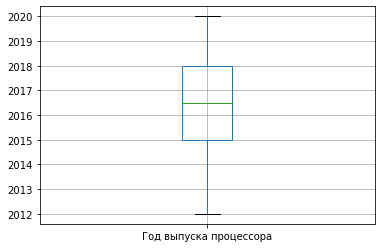

In [648]:
data.boxplot(num_cols[0])
None

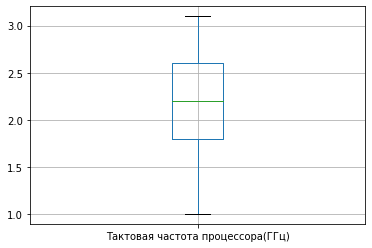

In [649]:
data.boxplot(num_cols[1])
None

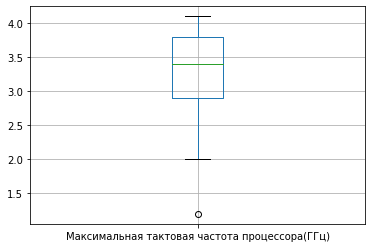

In [650]:
data.boxplot(num_cols[2])
None

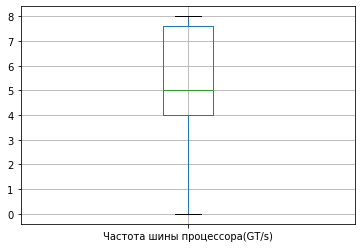

In [651]:
data.boxplot(num_cols[3])
None

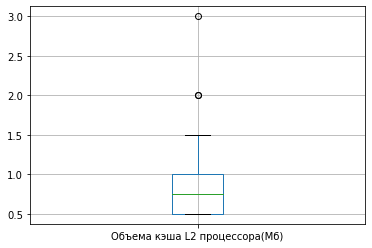

In [652]:
test = data.boxplot(num_cols[4], return_type='dict')
None

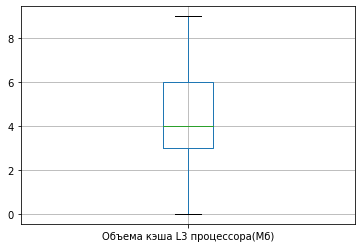

In [653]:
data.boxplot(num_cols[5])
None

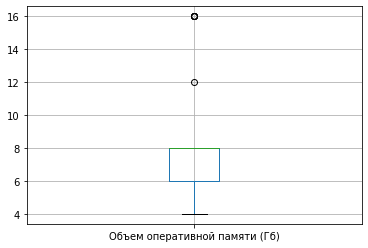

In [654]:
data.boxplot(column=num_cols[6])
None

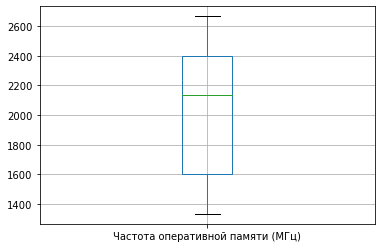

In [655]:
data.boxplot(column=num_cols[7])
None

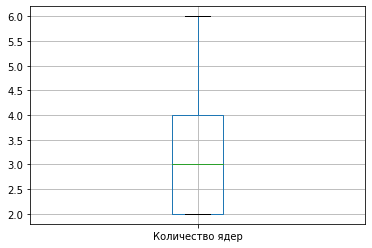

In [656]:
data.boxplot(num_cols[8])
None

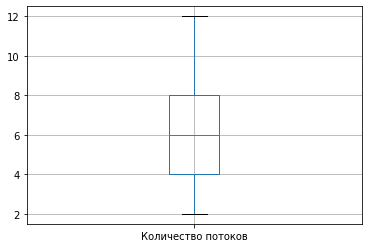

In [657]:
data.boxplot(num_cols[9])
None

In [658]:
def get_outlier(data, num_cols):
    res = {}
    for col in num_cols:
        q75, q25 = np.percentile(data[col], [75, 25])
        intr_qr = q75-q25
        top = q75+(1.5*intr_qr)
        low = q25-(1.5*intr_qr)
        out_arr = [data[data[col] > top].index.tolist()]
        out_arr.append(data[data[col] < low].index.tolist())
        res[col] = out_arr
    return res

In [659]:
get_outlier(data, num_cols)

{'Год выпуска процессора': [[], []],
 'Тактовая частота процессора(ГГц)': [[], []],
 'Максимальная тактовая частота процессора(ГГц)': [[], [27]],
 'Частота шины процессора(GT/s)': [[], []],
 'Объема кэша L2 процессора(Мб)': [[7, 17, 27], []],
 'Объема кэша L3 процессора(Мб)': [[], []],
 'Объем оперативной памяти (Гб)': [[0, 7, 11, 14, 18, 25], []],
 'Частота оперативной памяти (МГц)': [[], []],
 'Количество ядер': [[], []],
 'Количество потоков': [[], []]}

In [660]:
data = data.drop(index=[7])

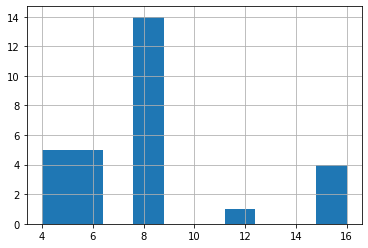

In [661]:
data['Объем оперативной памяти (Гб)'].hist()

In [662]:
data.loc[data['Объема кэша L3 процессора(Мб)'] == 0]['Объема кэша L3 процессора(Мб)']=np.NaN

In [663]:
data.columns

Index(['Год выпуска процессора', 'Тактовая частота процессора(ГГц)',
       'Максимальная тактовая частота процессора(ГГц)',
       'Частота шины процессора(GT/s)', 'Объема кэша L2 процессора(Мб)',
       'Объема кэша L3 процессора(Мб)', 'Объем оперативной памяти (Гб)',
       'Частота оперативной памяти (МГц)', 'Количество ядер',
       'Количество потоков', 'Тип оперативной памяти',
       'Вид графического ускорителя', 'HDD', 'SSD',
       'Результа ты в бенчмарке PCMark10'],
      dtype='object')

In [664]:
data = data.loc[(data['Частота шины процессора(GT/s)'] != 0) & (data['Объема кэша L3 процессора(Мб)'] != 0)]

In [665]:
num_cols

['Год выпуска процессора',
 'Тактовая частота процессора(ГГц)',
 'Максимальная тактовая частота процессора(ГГц)',
 'Частота шины процессора(GT/s)',
 'Объема кэша L2 процессора(Мб)',
 'Объема кэша L3 процессора(Мб)',
 'Объем оперативной памяти (Гб)',
 'Частота оперативной памяти (МГц)',
 'Количество ядер',
 'Количество потоков']

In [666]:
data['Объем оперативной памяти (Гб)'] = (data['Объем оперативной памяти (Гб)'] // 8 > 0).astype(int)

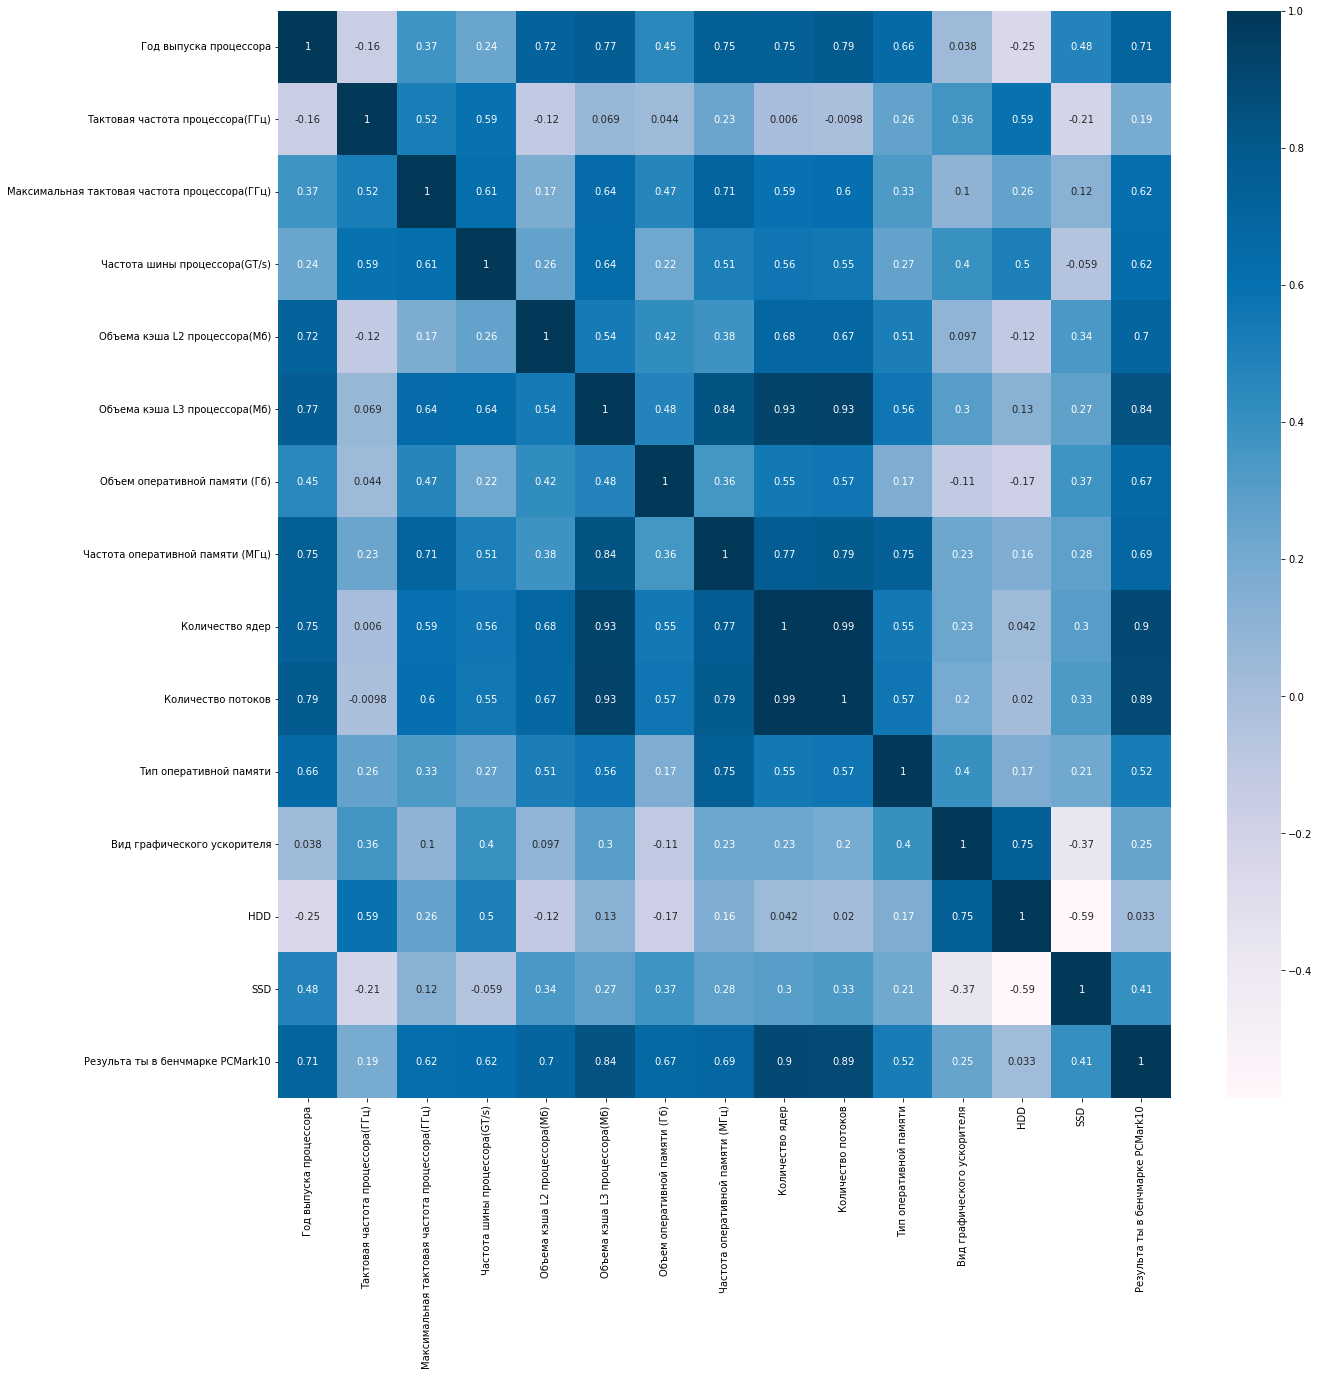

In [667]:
data
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot = True, cmap =plt.cm.PuBu)

In [668]:
def get_std_coefs(X, y):
    res = [0]
    X_z = sm.add_constant(X.select_dtypes(include=[np.number]).dropna().apply(stats.zscore))
    Y_z = pd.DataFrame(y).apply(stats.zscore)
    model = sm.OLS(Y_z, X_z).fit()
    res.extend(model.params.tolist())
    return pd.Series(res)

In [669]:
def get_pivot(df, model, param, label, num):
    pivot_test = pd.DataFrame()
    predictors = model.params.index.tolist()
    n = len(predictors)
    i = np.ones(n).astype(int) * num
    pivot_test['id'] = pd.Series(i)
    pivot_test['predictors'] = predictors
    pivot_test['b'] = model.params.tolist()
    pivot_test['std_err'] = model.bse.tolist()
    influence = model.get_influence()
    pivot_test['std coef'] = get_std_coefs(df[param], df[label])
    pivot_test['t'] = model.tvalues.tolist()
    pivot_test['lower interval'] = model.conf_int(alpha=0.05)[:][0].tolist()
    pivot_test['upper interval'] = model.conf_int(alpha=0.05)[:][1].tolist()
    return pivot_test.set_index('id')

In [670]:
def test_model(test_model):
    standardized_residuals = pd.DataFrame(test_model.resid).apply(stats.zscore)
    plt.scatter(standardized_residuals,pd.DataFrame(data[label]).apply(stats.zscore))
    plt.title("Диаграмма рассеивания\nЗависимая переменная: Результаты бенчмарка")
    plt.xlabel("Регрессия Стандартизированный остаток")
    plt.ylabel("Регрессия Стандартизированное предсказанное значение")
    plt.show()
    
    plt.title("Гистограмма\nЗависимая перменная: Результаты бенчмарка")
    plt.xlabel("Гистограмма Стандртизированный остаток")
    plt.ylabel("Частота")
    sns.distplot(standardized_residuals, bins = 8)
    plt.show()

    print("Тест RESET Рамсея")
    ram = sm.stats.diagnostic.linear_reset(test_model, power = 2, use_f=True)
    
    print("df_num = ",ram.df_num,"df_denum = ", ram.df_denom, "Уровень значимости = ",ram.pvalue)
    # R^2
    print("\nR =",sqrt(test_model.rsquared))
    print("R^2 = ",test_model.rsquared)
    print("Cкорректированный R^2=",test_model.rsquared_adj)

    print("\nF - статистика = ",ram.fvalue)
    f_crit = stats.f.ppf(q = ram.pvalue, dfn = ram.df_num,dfd = ram.df_denom)
    print("F критическое =",f_crit)
    if ram.fvalue <f_crit:
        print("Так как F - статистика < критического значения (",f_crit,"), Модель правильно специфицирована")
    else:
        print("Так как F - статистика >= критического значения (",f_crit,"), Модель не правильно специфицирована")
    # VIF
    vif = pd.DataFrame()
    features = test_model.params.index.drop("const")
    vif["predictors"] = features
    vif ["VIF values"] = [variance_inflation_factor(data[features].values, i)
                          for i in range(len(features))]
    print(vif)
    if max(vif["VIF values"])>=10:
        print("Присутствует мульиколлинеарность")
    else:
        print("Мультиколлинеарность не присутствует")
    dw = sm.stats.stattools.durbin_watson(test_model.resid)
    print("\nЗначение критерия Дурбина - Уотсона: ", dw)
    if abs(4 - dw) < abs(2 - dw):
        print("Отрицательная автокорреляция")
    elif dw < abs(2 - dw):
        print("Положительная автокорреляция")
    else:
        print("Остатки независимы")
    #print(model.summary())
    sh = shapiro(test_model.resid)
    print("\nЗначение критерия Шапиро", sh.statistic, "Значение коэффициента p", sh.pvalue)
    if sh.pvalue<0.05:
        print("Остатки не распределены нормально (p<0.05)")
    else:
        print("Нет оснований отвергнуть гипотезу о том, что остатки распределены номрально  (p>=0.05)")

In [671]:
label = 'Результа ты в бенчмарке PCMark10'

In [672]:
X_data = data.drop(label, axis=1)
Y_data = data.drop(X_data.columns, axis=1)

Y_stand = pd.DataFrame(data[label]).apply(stats.zscore)["Результа ты в бенчмарке PCMark10"]
X_stand = pd.DataFrame(data[{"Количество ядер","Объем оперативной памяти (Гб)","Тактовая частота процессора(ГГц)","Объема кэша L2 процессора(Мб)"}]).apply(stats.zscore)

Y = data[label]

In [673]:
predictors = data.drop(label, axis=1).to_dict()
sorted_predictors = sorted(predictors, key=lambda x: abs(data[x].corr(data[label])), reverse=True)

In [674]:
sorted_predictors

['Количество ядер',
 'Количество потоков',
 'Объема кэша L3 процессора(Мб)',
 'Год выпуска процессора',
 'Объема кэша L2 процессора(Мб)',
 'Частота оперативной памяти (МГц)',
 'Объем оперативной памяти (Гб)',
 'Частота шины процессора(GT/s)',
 'Максимальная тактовая частота процессора(ГГц)',
 'Тип оперативной памяти',
 'SSD',
 'Вид графического ускорителя',
 'Тактовая частота процессора(ГГц)',
 'HDD']

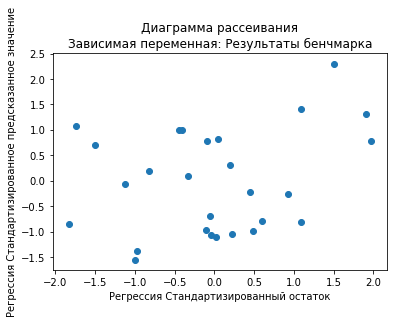

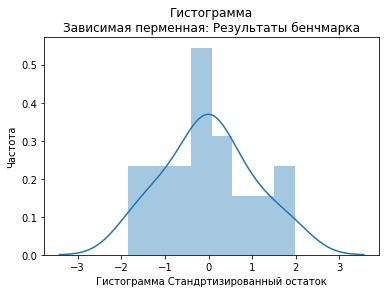

Тест RESET Рамсея
df_num =  1.0 df_denum =  19.0 Уровень значимости =  0.9062615601476611

R = 0.9616159947072758
R^2 =  0.9247053212768633
Cкорректированный R^2= 0.9021169176599223

F - статистика =  0.014241191886025475
F критическое = 3.113056256349405
Так как F - статистика < критического значения ( 3.113056256349405 ), Модель правильно специфицирована
                      predictors  VIF values
0                Количество ядер   18.821620
1  Объем оперативной памяти (Гб)    4.788900
2  Частота шины процессора(GT/s)   22.307348
3                            SSD    4.073450
4    Вид графического ускорителя    8.912419
5                            HDD   12.331374
Присутствует мульиколлинеарность

Значение критерия Дурбина - Уотсона:  2.059745379770871
Остатки независимы

Значение критерия Шапиро 0.9761260747909546 Значение коэффициента p 0.7664579153060913
Нет оснований отвергнуть гипотезу о том, что остатки распределены номрально  (p>=0.05)


In [675]:
pred_list = []
Y = data[label]
pivot_df = pd.DataFrame()
i = 1
for predictor in sorted_predictors:
    pred_list.append(predictor)
    X = sm.add_constant(data[pred_list])
    model = sm.OLS(Y, X).fit()
    F_crit = model.tvalues ** 2
    if F_crit[predictor] < 3.84:
        pred_list.pop()
    else:
        remove_list = list(F_crit[F_crit <= 2.71].index)
        for el in remove_list:
            if el in pred_list:
                pred_list.remove(el)
    if len(pred_list) != 0:
        model_info = get_pivot(data, model, pred_list, label, i)
        pivot_df = pd.concat([pivot_df, model_info], axis=0)
        i += 1
test_model(model)

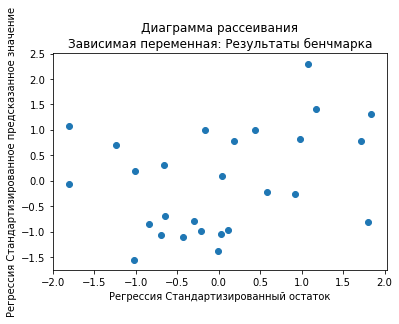

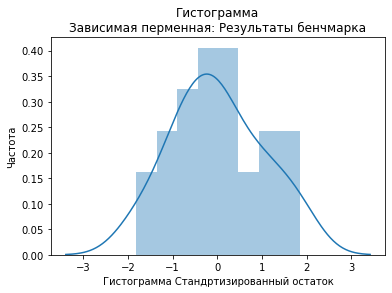

Тест RESET Рамсея
df_num =  1.0 df_denum =  21.0 Уровень значимости =  0.9386159128967421

R = 0.9494972465318685
R^2 =  0.9015450211715998
Cкорректированный R^2= 0.8836441159300725

F - статистика =  0.0060741940119006166
F критическое = 3.9063884077297053
Так как F - статистика < критического значения ( 3.9063884077297053 ), Модель правильно специфицирована
                         predictors  VIF values
0                   Количество ядер    9.449850
1     Объем оперативной памяти (Гб)    4.577701
2  Тактовая частота процессора(ГГц)    5.786623
3                               SSD    2.821076
Мультиколлинеарность не присутствует

Значение критерия Дурбина - Уотсона:  1.9485279508252127
Остатки независимы

Значение критерия Шапиро 0.9696008563041687 Значение коэффициента p 0.5912989377975464
Нет оснований отвергнуть гипотезу о том, что остатки распределены номрально  (p>=0.05)


In [676]:
current_features = []
ignore_features = [label]
for i in range(4):
    function_dict = {'predictor': [], 'r-squared':[]}
    for predictor in sorted_predictors:
        if predictor not in (current_features+ignore_features):
            selected_X = data[current_features + [predictor]]
            model = sm.OLS(Y, sm.add_constant(selected_X)).fit()
            F_crit = model.tvalues ** 2
            #print(predictor, F_crit[predictor])
            if F_crit[predictor]>=3.84:
                #We add the predictor to our model
                #Now, we check if any other predictor's F is <2.71 and if so we drop em out
                remove_list = list(F_crit[F_crit <= 2.71].index)
                for el in remove_list:
                    if el in selected_X.columns:
                        selected_X.drop(el)
                model = sm.OLS(Y,sm.add_constant(selected_X)).fit()
                if len(model.params)>=3:
                    #Check the VIF
                    vif = pd.DataFrame()
                    vif["predictors"] = selected_X.columns
                    vif ["VIF values"] = [variance_inflation_factor(selected_X.values, i)
                    for i in range(len(selected_X.columns))]
                    if max(vif["VIF values"])<=10:
                        y_preds = model.predict(sm.add_constant(selected_X))
                        #Add the column name to our dictionary
                        function_dict['predictor'].append(predictor)
                        #Calculate the r-squared value between the target and predicted target
                        r2 = np.corrcoef(Y, y_preds)[0, 1]**2
                        #Add the r-squared value to our dictionary
                        function_dict['r-squared'].append(r2)
                else:
                    y_preds = model.predict(sm.add_constant(selected_X))
                    #Add the column name to our dictionary
                    function_dict['predictor'].append(predictor)
                    #Calculate the r-squared value between the target and predicted target
                    r2 = np.corrcoef(Y, y_preds)[0, 1]**2
                    #Add the r-squared value to our dictionary
                    function_dict['r-squared'].append(r2)
    if len(function_dict['predictor'])>0:
        #Once it's iterated through every column, turn our dict into a sorted DataFrame
        function_df = pd.DataFrame(function_dict).sort_values(by=['r-squared'],ascending = False)
        current_features.append(function_df["predictor"][0])
model = sm.OLS(Y, sm.add_constant(data[current_features])).fit()

test_model(model)

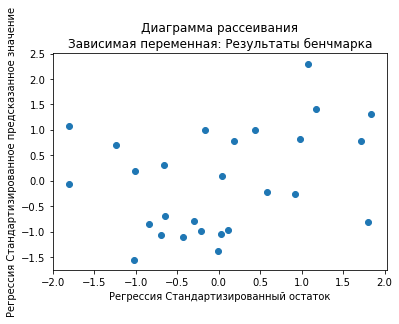

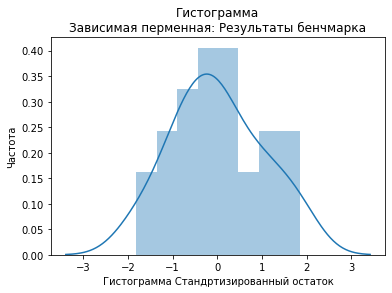

Тест RESET Рамсея
df_num =  1.0 df_denum =  21.0 Уровень значимости =  0.9386159128967421

R = 0.9494972465318685
R^2 =  0.9015450211715998
Cкорректированный R^2= 0.8836441159300725

F - статистика =  0.0060741940119006166
F критическое = 3.9063884077297053
Так как F - статистика < критического значения ( 3.9063884077297053 ), Модель правильно специфицирована
                         predictors  VIF values
0                   Количество ядер    9.449850
1     Объем оперативной памяти (Гб)    4.577701
2  Тактовая частота процессора(ГГц)    5.786623
3                               SSD    2.821076
Мультиколлинеарность не присутствует

Значение критерия Дурбина - Уотсона:  1.9485279508252127
Остатки независимы

Значение критерия Шапиро 0.9696008563041687 Значение коэффициента p 0.5912989377975464
Нет оснований отвергнуть гипотезу о том, что остатки распределены номрально  (p>=0.05)


In [677]:
odel = sm.OLS(Y, sm.add_constant(data[{"Объема кэша L2 процессора(Мб)","Количество ядер","Объем оперативной памяти (Гб)","Тактовая частота процессора(ГГц)"}])).fit()
test_model (model)